In [4]:
import ARIMA_routines as ar
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm

The smallest AIC is -139843.63818170418 for model ARMA(2, 0, 2)


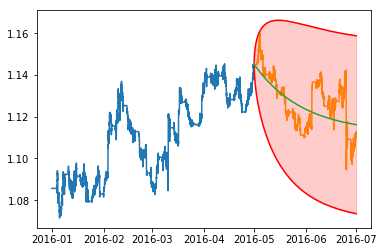

In [29]:
warnings.filterwarnings("ignore") # specify to ignore warning messages


# EUR to CAD 

# First we read in the sunspot data
fileName = "data/EURUSD_15m_BID_01.01.2010-31.12.2016.csv"

# Load the data
df = pd.read_csv(fileName, engine='python', skipfooter=3)
df = df[['Time', 'Close']].copy()


# A bit of pre-processing to make it nicer
df['Time']=pd.to_datetime(df['Time'], format='%Y-%m-%d')
df.set_index(['Time'], inplace=True)


# Now we split our data into training vs testing
train_data = df['2016-01-01 00:00':'2016-05-01 00:00']
test_data = df['2016-05-01 00:15':'2016-06-30 23:45']

pMax,dMax,qMax = 2,2,2

AIC,RMS, ARIMAX_model, results = ar.fit_ARIMAX(pMax,dMax,qMax,train_data,test_data,"AIC")

forecast, stderr, conf = results.forecast(len(test_data))

# Create a Dataframe with the forecast
df = pd.DataFrame(columns=['DATE', 'FORECAST'])
for i in range(len(test_data)):
    df.loc[i] = [test_data.index[i], forecast[i]]
    
df['DATE']=pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df.set_index(['DATE'], inplace=True)   

# Create a Dataframe for the upper bound of the forecast
df_conf_upper = pd.DataFrame(columns=['DATE', 'FORECAST_UPPER'])
df_conf_lower = pd.DataFrame(columns=['DATE', 'FORECAST_LOWER'])

for i in range(len(test_data)):
    df_conf_upper.loc[i] = [test_data.index[i], conf[i][1]]
    df_conf_lower.loc[i] = [test_data.index[i], conf[i][0]]


df_conf_upper['DATE']=pd.to_datetime(df_conf_upper['DATE'], format='%Y-%m-%d')
df_conf_lower['DATE']=pd.to_datetime(df_conf_lower['DATE'], format='%Y-%m-%d')

df_conf_upper.set_index(['DATE'], inplace=True)   
df_conf_lower.set_index(['DATE'], inplace=True)   


plt.plot(train_data)
plt.plot(test_data)
plt.plot(df_conf_upper,color='r')
plt.plot(df_conf_lower,color='r')
plt.fill_between(df_conf_upper.index,df_conf_lower.iloc[:,0],df_conf_upper.iloc[:,0],alpha=0.2, color='r')
plt.plot(df)
plt.show()

The smallest RMS is 10.096863938296307 for model SARIMAX(1, 1, 1)x(1, 0, 0, 12)7


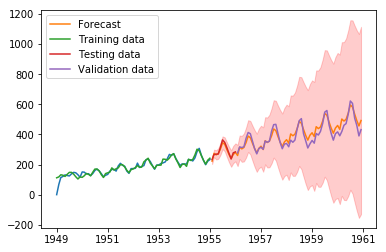

In [7]:
warnings.filterwarnings("ignore") # specify to ignore warning messages


# First we read in the sunspot data
fileName = "data/international-airline-passengers.csv"

# Load the data
df = pd.read_csv(fileName, engine='python', skipfooter=3)
# Process month to be a time format
df['Month']=pd.to_datetime(df['Month'], format='%Y-%m-%d')
df.set_index(['Month'], inplace=True)


# Split our data into training vs testing
train_data = df['1949-01-01':'1955-01-01']
test_data = df['1955-02-01':'1956-01-01']
validation_data = df['1956-02-01':'1960-12-01']



pMax,dMax,qMax,t = 1,1,2,12

AIC,RMS, SARIMAX_model, results = ar.fit_SARIMAX(pMax,dMax,qMax,t,train_data,test_data)

# Show the predictions
pred  =  results.get_forecast(validation_data.index[-1])
pred_ci = pred.conf_int()
pred_mean = pred.predicted_mean

plt.clf()
plt.plot(results.get_prediction(dynamic=False).predicted_mean[train_data.index[0]:train_data.index[-1]])
plt.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],alpha=0.2, color='r')
plt.plot(pred_mean,label="Forecast")
plt.plot(train_data,label="Training data")
plt.plot(test_data,label="Testing data")
plt.plot(validation_data,label='Validation data')
plt.legend(loc=2)
plt.show()

The smallest RMS is 49.013233274914754 for model ARMA(5, 0, 4)


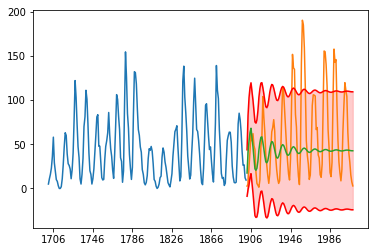

In [5]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

#=========================================
# Sunspot data set
#=========================================

dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

# Create a training vs test data set
train_data = dta['1700':'1900']
test_data = dta['1901':'2008']

pMax,dMax,qMax = 5,1,5

# Fit the ARMA model
AIC,RMS,ARMA_model,results = ar.fit_ARIMAX(pMax,dMax,qMax,train_data,test_data,"RMS")

forecast, stderr, conf = results.forecast(400)


# Create a Dataframe with the forecast
df = pd.DataFrame(columns=['DATE', 'FORECAST'])
for i in range(len(test_data)):
    df.loc[i] = [test_data.index[i], forecast[i]]
df['DATE']=pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df.set_index(['DATE'], inplace=True)   

# Create a Dataframe for the upper bound of the forecast
df_conf_upper = pd.DataFrame(columns=['DATE', 'FORECAST_UPPER'])
df_conf_lower = pd.DataFrame(columns=['DATE', 'FORECAST_LOWER'])

for i in range(len(test_data)):
    df_conf_upper.loc[i] = [test_data.index[i], conf[i][1]]
    df_conf_lower.loc[i] = [test_data.index[i], conf[i][0]]


df_conf_upper['DATE']=pd.to_datetime(df_conf_upper['DATE'], format='%Y-%m-%d')
df_conf_lower['DATE']=pd.to_datetime(df_conf_lower['DATE'], format='%Y-%m-%d')

df_conf_upper.set_index(['DATE'], inplace=True)   
df_conf_lower.set_index(['DATE'], inplace=True)   


plt.plot(train_data)
plt.plot(test_data)
plt.plot(df_conf_upper,color='r')
plt.plot(df_conf_lower,color='r')
plt.fill_between(df_conf_upper.index,df_conf_lower.iloc[:,0],df_conf_upper.iloc[:,0],alpha=0.2, color='r')
plt.plot(df)
#plt.xlim(["1946","1999"])
plt.show()

The smallest AIC is 55.85142973896112 for model SARIMAX(2, 1, 0)x(2, 1, 0, 12)77


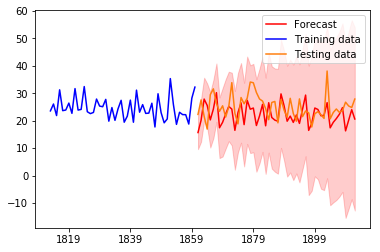

In [6]:
warnings.filterwarnings("ignore") # specify to ignore warning messages


# First we read in the sunspot data
fileName = "data/total-annual-rainfall-in-inches-.csv"

# Load the data
df = pd.read_csv(fileName, engine='python', skipfooter=3)
# A bit of pre-processing to make it nicer
df['Year']=pd.to_datetime(df['Year'], format='%Y-%m-%d')
df.set_index(['Year'], inplace=True)

# Now we split our data into training vs testing
train_data = df['1813-01-01':'1860-01-01']
test_data = df['1861-01-01':'1912-01-01']


pMax,dMax,qMax,t = 2,1,0,12

AIC,RMS, SARIMAX_model, results = ar.fit_SARIMAX(pMax,dMax,qMax,t,train_data,test_data,"AIC")

pred  =  results.get_forecast("1912-01-01")
pred_ci = pred.conf_int()
pred_mean = pred.predicted_mean

# SARIMAX(2, 1, 0)x(2, 1, 0, 12)
# Plot the results of fitting procedure
plt.clf()
plt.plot(results.get_prediction(dynamic=False).predicted_mean['1949-01-01':'1956-01-01'])
plt.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],alpha=0.2, color='r')
plt.plot(pred_mean,label="Forecast",c='r')
plt.plot(train_data,label="Training data", c='b')
plt.plot(test_data,label="Testing data")
plt.legend()
plt.show()